In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

In [117]:
# Laste poll-of-polls data
df = pd.read_csv("../data/v2_data_august.csv", sep=",")

In [118]:
df["Mnd"] = pd.to_datetime(df["Mnd"])

In [119]:
# Sort values and set index
df = df.sort_values("Mnd")
df.set_index("Mnd", inplace=True)

In [120]:
X_elect=df.loc[df.index==pd.to_datetime('2025-09-30')]

In [121]:
X_elect

,Ap,Hoyre,Frp,SV,SP,KrF,Venstre,MDG,Rodt,Andre,...,Rodt_reg_lag3,Rodt_reg_lag6,Andre_reg_lag3,Andre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,,
2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.25,0.0,-0.041667


In [122]:
df=df.dropna()

In [123]:
df

,Ap,Hoyre,Frp,SV,SP,KrF,Venstre,MDG,Rodt,Andre,...,Rodt_reg_lag3,Rodt_reg_lag6,Andre_reg_lag3,Andre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,,
2008-06-30,26.0,17.6,28.9,6.9,5.3,6.1,5.9,0.0,1.8,0.0,...,0.0,0.0,0.0,0.0,2.9,0.067,0.050000,5.54,0.076667,0.048333
2008-07-31,26.9,17.2,30.2,6.6,4.7,6.1,5.4,0.0,1.9,0.0,...,0.0,0.0,0.0,0.0,2.9,0.033,0.050000,5.75,0.083333,0.083333
2008-08-31,26.6,16.2,30.9,6.7,5.2,5.5,6.0,0.0,1.7,0.0,...,0.0,0.0,0.0,0.0,3.0,0.033,0.066667,5.75,0.070000,0.083333
2008-09-30,28.9,15.2,29.9,6.3,5.0,5.7,5.9,0.0,1.5,0.0,...,0.0,0.0,0.0,0.0,3.1,0.067,0.066667,5.75,0.000000,0.073333
2008-10-31,30.6,16.1,26.7,7.3,5.3,5.6,5.5,0.0,1.2,0.0,...,0.0,0.0,0.0,0.0,3.1,0.033,0.050000,5.45,-0.100000,-0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,28.1,19.8,20.0,6.3,6.7,3.3,3.9,3.1,4.8,3.9,...,0.0,0.0,0.0,0.0,4.0,-0.033,-0.016667,4.50,0.000000,0.000000
2025-05-31,28.5,18.7,20.6,7.0,5.7,3.6,4.1,2.7,5.3,3.8,...,0.0,0.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000
2025-06-30,28.3,16.2,21.0,6.9,5.6,3.7,4.5,3.0,6.2,4.5,...,0.0,0.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000


In [124]:
parties=['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG','Rodt', 'Andre']
predictions=[]

In [125]:
def create_lags_and_trends(df, parties, lags=[3,6]):
    """
    Create lag and trend columns for each party.
    
    Args:
        df: DataFrame with party columns
        parties: list of party names
        lags: list of integers representing lag in months
    
    Returns:
        DataFrame with lag and trend columns added
    """
    df_new = df.copy()
    
    for party in parties:
        for lag in lags:
            lag_col = f"{party}_lag{lag}"
            trend_col = f"{party}_trend{lag}"
            
            df_new[lag_col] = df_new[party].shift(lag)
            df_new[trend_col] = (df_new[party] - df_new[party].shift(lag))/lag
    
    return df_new


In [126]:
lags = [1,2,3,4,5,6,7,8,9,10,11,12]

df_features = create_lags_and_trends(df, parties, lags=lags)
#print(df_features.head(10))

C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_32916\1723246952.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[lag_col] = df_new[party].shift(lag)
C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_32916\1723246952.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[trend_col] = (df_new[party] - df_new[party].shift(lag))/lag
C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_32916\1723246952.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [127]:
df_features.columns

Index(['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG', 'Rodt',
       'Andre',
       ...
       'Andre_lag8', 'Andre_trend8', 'Andre_lag9', 'Andre_trend9',
       'Andre_lag10', 'Andre_trend10', 'Andre_lag11', 'Andre_trend11',
       'Andre_lag12', 'Andre_trend12'],
      dtype='object', length=216)

In [128]:
df_features.dropna(inplace=True)

In [129]:
cutoff = pd.to_datetime('2025-03-31')
pred = []

# Select only lag and trend columns
lag_trend_cols = [c for c in df_features.columns if ('lag' in c or 'trend' in c)]

for party in parties:
    # Target: current party values
    y = df_features[[party]].loc[df_features.index <= cutoff]
    
    # Features: only lag/trend columns
    X = df_features.loc[df_features.index <= cutoff]
    X_future = df_features.loc[df_features.index > cutoff]
    
    # Future target
    y_future = df_features[[party]].loc[df_features.index > cutoff]
    
    pipeline = Pipeline([
        ("feature_selection", SelectFromModel(
            RandomForestRegressor(n_estimators=100, random_state=69),
            threshold="median"
        )),
        ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    #print(X)
    pipeline.fit(X, y.values.ravel())
    
    hist = pipeline.predict(X)
    fut = pipeline.predict(X_future)
    
    combined_preds = np.concatenate([hist, fut])
    
    r2 = r2_score(y_future, fut)
    print({
        'party': party,
        'r2_score': r2
    })
    
    pred.append(combined_preds)

{'party': 'Ap', 'r2_score': 0.9608774999999941}
{'party': 'Hoyre', 'r2_score': -0.5972841704405012}
{'party': 'Frp', 'r2_score': 0.1754191331923748}
{'party': 'SV', 'r2_score': 0.9811326699834167}
{'party': 'SP', 'r2_score': 0.995834146341464}
{'party': 'KrF', 'r2_score': 0.9775044843049335}
{'party': 'Venstre', 'r2_score': 0.9964279661016949}
{'party': 'MDG', 'r2_score': 0.995737967914438}
{'party': 'Rodt', 'r2_score': 0.9749369369369382}
{'party': 'Andre', 'r2_score': 0.9890298353909466}


In [130]:
# Combine predictions into DataFrame
pred_df = pd.DataFrame(
    np.column_stack(pred),
    columns=parties,
    index=df_features.index
)

In [131]:
fut

array([3.928, 3.802, 4.485, 4.063, 5.091])

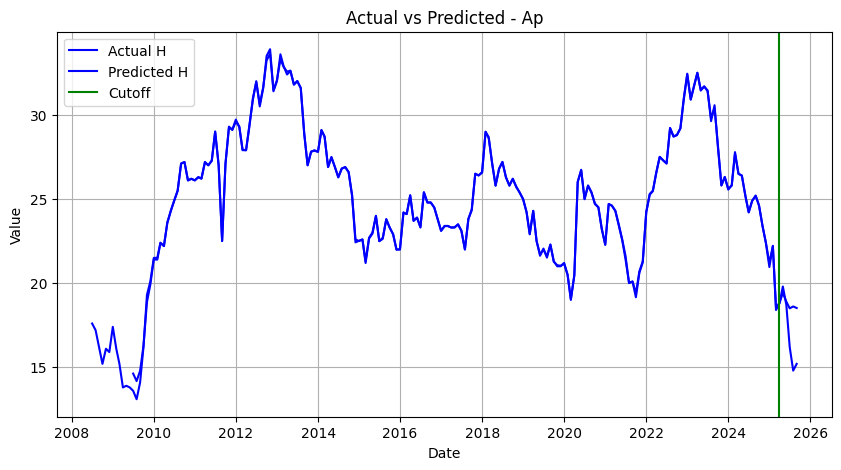

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(df.index, df['Hoyre'], label='Actual H', color='blue')
plt.plot(pred_df.index, pred_df['Hoyre'], label='Predicted H', color='blue')
plt.axvline(x=cutoff, color='green', linestyle='-', label='Cutoff')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted - Ap')
plt.legend()
plt.grid(True)
plt.show()